Evaluating the classification accuracy of BERT, BART, GPT, Llama models (which are politically leaning) on text classification accuracy of politically biased statements. 

In [25]:
import pandas as pd
from transformers import pipeline

In [26]:

bart = pd.read_csv("data/IBC/sample_ibc.csv")
deberta = pd.read_csv("data/IBC/sample_ibc.csv")

In [23]:
# bart
pipe = pipeline(model="facebook/bart-large-mnli")

political_labels = ["Liberal", "Conservative", "Neutral"]

def classify_sentence(sentence):
    result = pipe(sentence, candidate_labels=political_labels)
    top_label = result["labels"][0]
    return top_label

# bart["predicted_label"] = bart["sentence"].apply(classify_sentence)

# correct_predictions = (bart["predicted_label"] == bart["label"]).sum()

# total_sentences = len(bart)
# accuracy = correct_predictions / total_sentences

# print(f"Correct predictions: {correct_predictions}")
# print(f"Total sentences: {total_sentences}")
# print(f"Accuracy: {accuracy:.2%}")

result = pipe(bart.loc[0, "sentence"], candidate_labels=political_labels)
top_label = result["labels"][0]
print(bart.iloc[0], top_label)

/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Unnamed: 0                                                    0
sentence      First , government plays an important role thr...
label                                                   Liberal
Name: 0, dtype: object Neutral


In [27]:
# roberta and deberta, deberta out-performs roberta
# cross-encoder/nli-deberta-v3-base

# bert
pipe = pipeline(model="cross-encoder/nli-deberta-v3-base")

political_labels = ["Liberal", "Conservative", "Neutral"]

def classify_sentence(sentence):
    result = pipe(sentence, candidate_labels=political_labels)
    top_label = result["labels"][0]
    return top_label

deberta["predicted_label"] = deberta["sentence"].apply(classify_sentence)

correct_predictions = (deberta["predicted_label"] == deberta["label"]).sum()

total_sentences = len(deberta)
accuracy = correct_predictions / total_sentences

print(f"Correct predictions: {correct_predictions}")
print(f"Total sentences: {total_sentences}")
print(f"Accuracy: {accuracy:.2%}")


ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.

In [12]:
# messed up the data transfer from GPT return, so have to clean
def extract_prediction(sentence):
    return sentence.replace("ChatCompletionMessage(content='", "").replace("', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)", "")

extract_prediction("ChatCompletionMessage(content='Neutral', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)")

'Neutral'

In [13]:
gpt4_data = pd.read_csv("results/gpt-4.csv")
gpt4o_data = pd.read_csv("results/gpt-4o.csv")
gpt4omini_data = pd.read_csv("results/gpt-4o-mini.csv")

gpt4_data.classification = gpt4_data.classification.apply(extract_prediction)
gpt4o_data.classification = gpt4o_data.classification.apply(extract_prediction)
gpt4omini_data.classification = gpt4omini_data.classification.apply(extract_prediction)

gpt4_data.iloc[0]


Unnamed: 0                                                        7
sentence          Still , as backlash reactions like the attack ...
label                                                       Liberal
classification                                              Liberal
Name: 0, dtype: object

In [29]:
liberal_preds = {"gpt-4": gpt4_data.classification.value_counts()["Liberal"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Liberal"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Liberal"]}

neutral_preds = {"gpt-4": gpt4_data.classification.value_counts()["Neutral"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Neutral"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Neutral"]}

conservative_preds = {"gpt-4": gpt4_data.classification.value_counts()["Conservative"], 
                 "gpt-4o": gpt4o_data.classification.value_counts()["Conservative"], 
                 "gpt-4o-mini": gpt4omini_data.classification.value_counts()["Conservative"]}

print(liberal_preds, neutral_preds, conservative_preds)

{'gpt-4': 40, 'gpt-4o': 36, 'gpt-4o-mini': 41} {'gpt-4': 76, 'gpt-4o': 77, 'gpt-4o-mini': 94} {'gpt-4': 34, 'gpt-4o': 37, 'gpt-4o-mini': 15}


In [31]:
import matplotlib.pyplot as plt
import numpy as np

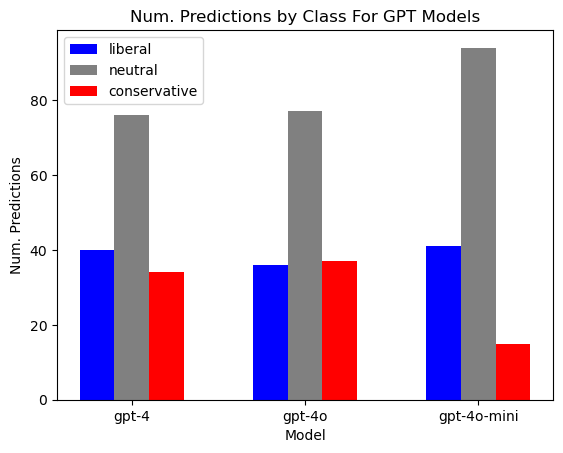

In [35]:
keys = list(liberal_preds.keys())
val1 = list(liberal_preds.values())
val2 = list(neutral_preds.values())
val3 = list(conservative_preds.values())

x = np.arange(len(keys))

width = 0.2

plt.bar(x - width, val1, width, label="liberal", color="blue")
plt.bar(x, val2, width, label="neutral", color="gray")
plt.bar(x + width, val3, width, label="conservative", color="red")

plt.xlabel("Model")
plt.ylabel("Num. Predictions")
plt.title("Num. Predictions by Class For GPT Models")
plt.xticks(x, keys)
plt.legend()

plt.show()